# Final Project: Steam game
| MSSV     | Họ và tên       | Phân công |
|----------|---------------- | --------- |
| 21120313  | Trần Nam Phương   | Tiền xử lý dữ liệu + Câu hỏi 1 |
| 21120324 | Mai Đăng Đức Tài  | Thu thập dữ liệu + Câu hỏi 3 và 4 |
| 21120351 | Nguyễn Thành Trung | Tiền xử lý dữ liệu + Câu hỏi 2|

## Môi trường code
Notebook chạy với môi trường `min_ds-env`

## 1. Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data collection

Nhóm sẽ dùng [dữ liệu đã được thu thập sẵn](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data) là file `games.csv` đính kèm.

Giải thích dữ liệu
- Chủ đề của dữ liệu là về chủ đề game. Cụ thể thông tin của hơn 83.000 game được xuất bản trên Steam.
- Nguồn của dữ liệu được đăng công khai trên kaggle như link đã cung cấp ở trên.

- Dữ liệu được tác giả cho phép để sử dụng. Với license [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

- Nguồn gốc dữ liệu đã được thu thập nhờ API Web do Steam cung cấp. Chỉ các trò chơi (không có DLC, tập, nhạc, video, v.v.) hiện được phát hành mới được thêm vào.

## 3. Data pre-processing and exploration

In [2]:
game_df = pd.read_csv('./games.csv')
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
n_row, n_col = game_df.shape

print(f'Số lượng dòng: {n_row}')
print(f'Số lượng cột: {n_col}')

Số lượng dòng: 83560
Số lượng cột: 39


### Mỗi dòng có ý nghĩa gì? 
- Mỗi dòng là thông tin về các tựa game trên Steam gồm các thông tin của game, các thông số của tập người chơi game đó.

### Dữ liệu có các dòng bị lặp không? 

In [4]:
num_duplicate_rows = game_df.duplicated().sum()

print(f'Số lượng dòng trùng lặp: {num_duplicate_rows}')

Số lượng dòng trùng lặp: 0


### Mỗi cột có ý nghĩa gì?

- `AppID` : Mã định danh duy nhất cho mỗi game
- `Name`: Tên game
- `Release date`: Ngày phát hành
- `Estimated owners`: số người sở hữu ước tính
- `Peak CCU`:  số lượng người dùng đồng thời cao nhất trong một khoảng thời gian
- `Required age`: Độ tuổi yêu cầu để có thể chơi trò chơi
- `Price`: Giá (USD)
- `DLC count`: Số lượng DLC (nội dung có thể tải xuống) mà trò chơi đó có, Nếu không có thì sẽ là 0.
- `About the game`: Mô tả chi tiết của trò chơi
- `Supported languages`: Các ngôn ngữ game hỗ trợ
- `Full audio languages`: Các ngôn ngữ lông tiếng game hỗ trợ
- `Reviews`: Đánh giá về game
- `Header image`: URL hình ảnh tiêu đề của game trong cửa hàng
- `Website`: Trang web của game
- `Support url`: URL trang web hỗ trợ của game
- `Support email`: Email hỗ trợ
- `Windows`: Game có hỗ trợ chạy trên Windows hay không?
- `Mac`: Game có hỗ trợ chạy trên Mac hay không?
- `Linux`: Game có hỗ trợ chạy trên Linux hay không?
- `Metacritic score`: Là điểm của trò chơi trên trang web Metacritic, nếu không có thì là 0
- `Metacritic url`: Là đường dẫn tới Metacritic của trò chơi đó. Nếu không có điểm thì nó sẽ là một chuỗi trống.
- `User score`: Là điểm của người dùng đối với trò chơi theo trang web SteamSpy. Nếu trang web này không có xếp hạng của người dùng cho trò chơi đó thì nó sẽ là 0.
- `Positive`: Số đánh giá tích cực về trò chơi
- `Negative`: Số đánh giá tiêu cực về trò chơi
- `Score rank`: Xếp hạng điểm của trò chơi dựa trên đánh giá của người dùng
- `Achievements:` Số thành tích
- `Recommendations`: Đề xuất của người dùng
- `Notes`: Thông tin bổ sung về nội dung trò chơi
- `Average playtime forever`: Thời gian chơi trung bình kể từ tháng 3 năm 2009, tính bằng phút
- `Average playtime two weeks`: Thời gian chơi trung bình trong hai tuần qua, tính bằng phút
- `Median playtime forever`: Thời gian chơi lấy theo trung vị kể từ tháng 3 năm 2009
- `Median playtime two weeks`: Thời gian chơi theo trung vị trong hai tuần qua
- `Developers`: Tên người phát triển
- `Publishers`: Nhà phát hành
- `Categories`: Phân loại của game (cách phân loại rộng hơn, không nhất thiết liên quan đến cách chơi hay trải nghiệm.)
- `Genres`:Phân loại dựa trên các yếu tố như cơ chế chơi, cách tiếp cận người chơi, và trải nghiệm tổng thể của trò chơi.
- `Tags`: từ khóa hoặc nhóm từ được gắn kết với một trò chơi để mô tả các đặc điểm, chủ đề, hoặc yếu tố cụ thể của trò chơi
- `Screenshots`:URL ảnh chụp màn hình trò chơi
- `Movies`:Game movies.

### Xóa đi các cột không cần thiết

Những cột như `Website`, `Support url`, `Header image`, `Support email`, `Metacritic url`, `Developers`, `Screenshots`, `Movies`, `About the game` đây là những thông tin chủ yếu liên quan đến mặt marketing của game sẽ không có ích cho quá trình phân tích dữ liệu vì vậy cần tiến hành loại bỏ

In [5]:
cols_to_drop = ['About the game','Header image','Support email','Developers','Screenshots','Movies','Website','Support url','Metacritic url']
game_df = game_df.drop(cols_to_drop, axis=1)
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,['English'],[],...,0,NaN,0,0,0,0,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,NaN,0,0,0,0,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,NaN,0,0,0,0,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,NaN,0,0,0,0,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


Kiểm tra missing value của từng cột

In [6]:
def missing_ratio(col):
    return (col.isna().sum() *100/ len(col)).round(1)
missing_ratio_df = game_df.agg(missing_ratio)
missing_ratio_df

AppID                          0.0
Name                           0.0
Release date                   0.0
Estimated owners               0.0
Peak CCU                       0.0
Required age                   0.0
Price                          0.0
DLC count                      0.0
Supported languages            0.0
Full audio languages           0.0
Reviews                       88.4
Windows                        0.0
Mac                            0.0
Linux                          0.0
Metacritic score               0.0
User score                     0.0
Positive                       0.0
Negative                       0.0
Score rank                    99.9
Achievements                   0.0
Recommendations                0.0
Notes                         84.8
Average playtime forever       0.0
Average playtime two weeks     0.0
Median playtime forever        0.0
Median playtime two weeks      0.0
Publishers                     4.4
Categories                     5.3
Genres              

Loại bỏ những cột có missing value lớn hơn 70%, không thể sử dụng cho việc phân tích

In [7]:
cols_to_drop = missing_ratio_df[missing_ratio_df > 70].index
game_df = game_df.drop(cols_to_drop, axis=1)
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,['English'],[],...,30,0,0,0,0,0,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,12,0,0,0,0,0,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,0,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,0,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,17,0,0,0,0,0,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   Supported languages         83560 non-null  object 
 9   Full audio languages        83560 non-null  object 
 10  Windows                     83560 non-null  bool   
 11  Mac                         83560 non-null  bool   
 12  Linux                       83560 non-null  bool   
 13  Metacritic score            835

Thay đổi kiểu dữ liệu của cột Release date về `datetime` và AppID về kiểu `string` để dễ xử lí phía sau hơn

In [9]:
game_df['Release date'] = pd.to_datetime(game_df['Release date'])
game_df['AppID'] = game_df['AppID'].astype(str)

Chuyển đổi cột Supported languages và Full audio languages từ dạng `['','']` sang dạng chuỗi phân tách bằng dấu phẩy để dễ xử lí hơn

In [10]:
def convert_string(value):
    if value is None or not isinstance(value, str):
        return None
    
    # Loại bỏ dấu ngoặc vuông và dấu nháy
    value = value.strip("[]")
    value = value.replace("'", "")
    if not value:
        return None
    
    # Loại bỏ khoảng trắng thừa và phân tách các giá trị bằng dấu phẩy
    value = ','.join([item.strip() for item in value.split(",") if item])
    return value

game_df['Supported languages'] = game_df['Supported languages'].apply(convert_string)
game_df['Full audio languages'] = game_df['Full audio languages'].apply(convert_string)
game_df['Supported languages']


0                                                  English
1        English,French,Italian,German,Spanish - Spain,...
2                              English,Portuguese - Brazil
3        English,French,Italian,German,Spanish - Spain,...
4                                  English,Spanish - Spain
                               ...                        
83555                                              English
83556    English,French,Italian,German,Spanish - Spain,...
83557    English,Simplified Chinese,Korean,Russian,Japa...
83558                                              English
83559    English,French,Italian,German,Spanish - Spain,...
Name: Supported languages, Length: 83560, dtype: object

### Với mỗi cột dạng số, các giá trị được phân bố như thế nào?

In [11]:
num_col_df = game_df.select_dtypes(include=['int64', 'float64'])
def missing_ratio(col):
    return (col.isna().sum() *100/ len(col)).round(1)
def lower_quartile(col):
    return (col.quantile(0.25)).round(1)
def median(col):
    return (col.quantile(0.5)).round(1)
def upper_quartile(col):
    return (col.quantile(0.75)).round(1)

num_col_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_df


,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
missing_ratio,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
median,0.0,0.0,4.50,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
upper_quartile,1.0,0.0,10.00,0.0,0.0,0.0,47.0,14.0,18.0,0.0,0.0,0.0,0.0,0.0
max,872138.0,21.0,999.98,2366.0,97.0,100.0,5764420.0,895978.0,9821.0,3441592.0,145727.0,19159.0,208473.0,19159.0


In [12]:
columns_with_missing = num_col_df.columns[num_col_df.loc["missing_ratio"] != 0]
print(columns_with_missing)

Index([], dtype='object')


Như vậy không có cột dữ liệu số nào có giá trị bị mất cả nên không cần phải xử lí thêm

### Có bao nhiêu giá trị khác nhau? 

In [13]:
num_cols = game_df.select_dtypes(include=['int64', 'float64']).columns
num_df = game_df[num_cols]

num_profile = num_df.agg(lambda col: (col.nunique(), col.value_counts().to_dict())).T
num_profile.columns = ['num_values', 'value_ratios']
num_profile = num_profile.T
num_profile

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
num_values,1435,19,574,95,73,33,4531,2302,431,4034,2209,779,1896,782
value_ratios,"{0: 61189, 1: 6984, 2: 2800, 3: 1572, 4: 1132,...","{0: 81930, 17: 915, 18: 329, 13: 202, 16: 68, ...","{0.0: 16108, 4.99: 7691, 9.99: 7164, 0.99: 645...","{0: 71798, 1: 7540, 2: 1871, 3: 713, 4: 392, 5...","{0: 79650, 80: 190, 76: 171, 77: 170, 78: 166,...","{0: 83516, 100: 5, 80: 2, 84: 2, 46: 2, 94: 2,...","{0: 22179, 1: 5192, 2: 3900, 3: 3019, 4: 2591,...","{0: 32574, 1: 7928, 2: 4831, 3: 3339, 4: 2632,...","{0: 42351, 10: 2084, 12: 1634, 20: 1473, 6: 13...","{0: 69837, 116: 69, 106: 65, 101: 60, 105: 60,...","{0: 68656, 1: 342, 2: 133, 4: 106, 3: 105, 5: ...","{0: 81512, 1: 74, 2: 24, 3: 24, 8: 21, 4: 20, ...","{0: 68656, 1: 334, 2: 130, 3: 103, 4: 101, 6: ...","{0: 81512, 1: 74, 3: 25, 2: 23, 8: 20, 5: 19, ..."


#### Trực quan hóa mối tương quan giữa các dữ liệu số

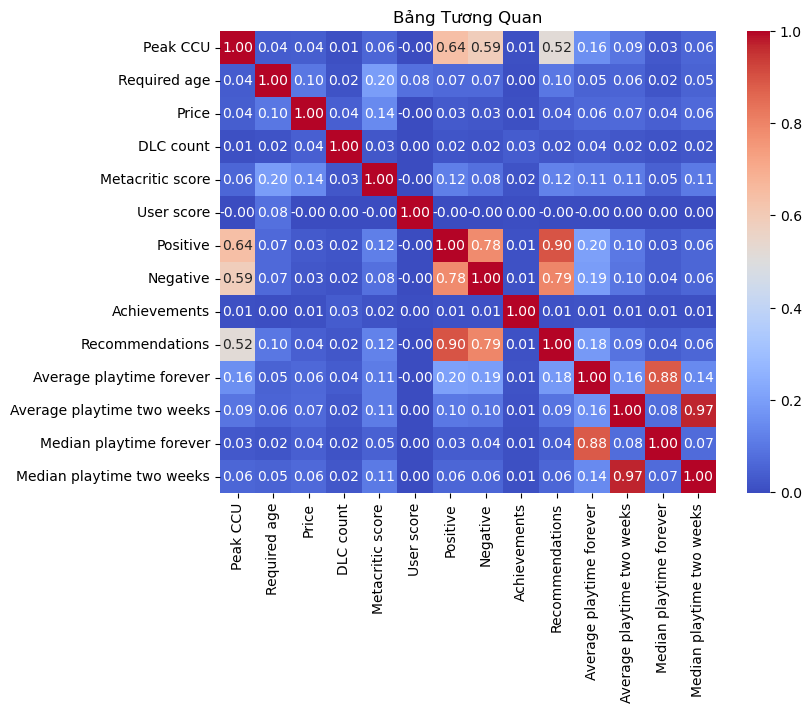

In [14]:
# Tính toán ma trận tương quan
correlation_matrix = num_df.corr()

# Trực quan hóa bảng tương quan bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Bảng Tương Quan')
plt.show()

**Nhận xét**
- Đa số các cột đều không có mối tương quan với nhau.
- Trừ 3 cột Positive,Negative, Recommendations có tương quan với nhau.

### Với mỗi cột có kiểu dữ liệu dạng phân loại, các giá trị được phân bố như thế nào?

In [15]:
cat_col_info_df = game_df.select_dtypes(include='object')
multi_answer_cols = ['Supported languages', 'Full audio languages', 'Categories', 'Genres', 'Tags']
def missing_ratio(columns): 
    return 100 * (1 - columns.count() / len(columns))
def num_values(column):
    if column.name in multi_answer_cols:
        # Tách chuỗi bằng dấu phẩy và chuyển thành Series
        # Sau đó sử dụng explode để phẳng hóa list
        return column.str.split(',').explode().nunique()
    return column.nunique()

def value_ratios(column):
    if column.name in multi_answer_cols:
        return (column.str.split(',').explode().value_counts(normalize=True) * 100).round(1).to_dict()
    return (column.value_counts(normalize=True) * 100).round(1).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,AppID,Name,Estimated owners,Supported languages,Full audio languages,Publishers,Categories,Genres,Tags
missing_ratio,0.0,0.00718,0.0,4.021063,58.099569,4.43394,5.332695,4.098851,23.918143
num_values,83560,82842,14,132,121,42571,41,33,448
value_ratios,"{'20200': 0.0, '1423080': 0.0, '1452200': 0.0,...",{'Shadow of the Tomb Raider: Definitive Editio...,"{'0 - 20000': 65.2, '0 - 0': 12.9, '20000 - 50...","{'English': 24.9, 'Simplified Chinese': 6.1, '...","{'English': 31.1, 'Simplified Chinese': 4.8, '...","{'Big Fish Games': 0.6, '8floor': 0.3, 'SEGA':...","{'Single-player': 29.2, 'Steam Achievements': ...","{'Indie': 24.4, 'Casual': 14.6, 'Action': 14.5...","{'Indie': 5.0, 'Singleplayer': 4.1, 'Action': ..."


## 4. Đặt câu hỏi

### Câu hỏi 1: Liệu những nhà phát hành có nhiều đề xuất nhất trên Steam có nhận được nhiều đánh giá tích cực hơn tiêu cực không?
#### Mục đích: 
-   Phân tích mối quan hệ giữa số lượng đề xuất và tỷ lệ giữa đánh giá tích cực và tiêu cực cho các nhà phát hành được đề xuất nhiều nhất. 
-   Xác định liệu sự yêu thích và uy tín của nhà phát hành có liên quan trực tiếp đến sự hài lòng của người chơi hay không.

#### Tiền xử lý: 
-   Tính toán và xác định các nhà phát hành có số lượng đề xuất ('Recommendations') cao nhất.
-   Đối với mỗi nhà phát hành trong nhóm này, tính tổng số lượng đánh giá tích cực ('Positive') và tiêu cực ('Negative').
-   Tính tỷ lệ phần trăm giữa đánh giá tích cực và tiêu cực cho mỗi nhà phát hành

#### Giải quyết

Các nhà phát hành có số lượng đề xuất cao nhất

In [16]:
publisher_recommendations = game_df.groupby('Publishers')['Recommendations'].sum()

# Xác định top nhà phát hành
top_publishers = publisher_recommendations.nlargest(5).index

# Lấy top 5 nhà phát hành
top_5_publishers = publisher_recommendations.sort_values(ascending=False).head(5)
top_5_publishers

Publishers
Valve              5971667
Ubisoft            5826159
Rockstar Games     1839197
KRAFTON, Inc.      1634104
Electronic Arts    1566641
Name: Recommendations, dtype: int64

Trực quan hóa 

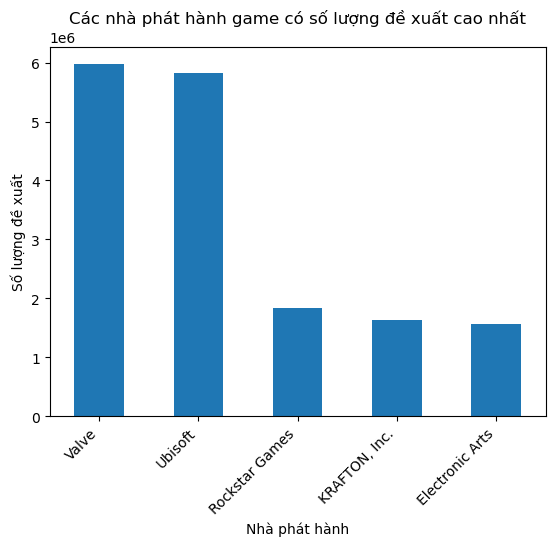

In [17]:
top_5_publishers.plot(kind='bar')
plt.title('Các nhà phát hành game có số lượng đề xuất cao nhất')
plt.xlabel('Nhà phát hành')
plt.ylabel('Số lượng đề xuất')
plt.xticks(rotation=45, ha='right')
plt.show()

Sự khác nhau về số đánh giá tích cực và tiêu cực của các nhà phát hành này

In [18]:
# Tính tổng số đánh giá tích cực và tiêu cực cho những nhà phát hành này
top_publishers_data = game_df[game_df['Publishers'].isin(top_publishers)]
review_sums = top_publishers_data.groupby('Publishers')[['Positive', 'Negative']].sum()

# Tính tỷ lệ phần trăm
review_percentages = (review_sums.div(review_sums.sum(axis=1), axis=0) * 100).round(1)
review_percentages

,Positive,Negative
Publishers,,
Electronic Arts,80.7,19.3
"KRAFTON, Inc.",56.3,43.7
Rockstar Games,85.3,14.7
Ubisoft,83.3,16.7
Valve,89.9,10.1


Trực quan hóa

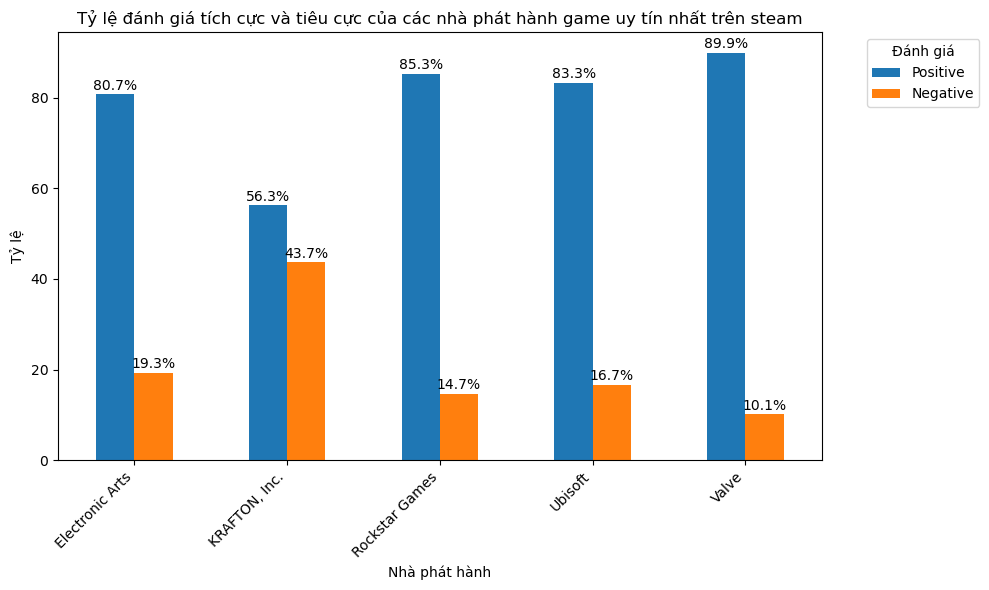

In [19]:
ax = review_percentages.plot(kind='bar', figsize=(10, 6))
offset = 1 
# Thêm annotation cho mỗi cột
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height + offset), ha='center')

ax.legend(title='Đánh giá', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.title('Tỷ lệ đánh giá tích cực và tiêu cực của các nhà phát hành game uy tín nhất trên steam')
plt.xlabel('Nhà phát hành')
plt.ylabel('Tỷ lệ')
#plt.legend(title='Đánh giá')
plt.tight_layout()  
plt.show()

#### Nhận xét:
-   Valve nổi bật với tỷ lệ đánh giá tích cực cao nhất (89.9%) và tỷ lệ đánh giá tiêu cực thấp nhất (10.1%), điều này phản ánh mức độ uy tín và sự hài lòng rất cao từ người chơi đối với các sản phẩm của họ.
-   KRAFTON, Inc. có tỷ lệ đánh giá tích cực và tiêu cực gần như ngang nhau (56.3% tích cực và 43.7% tiêu cực).
-   Rockstar Games, Ubisoft và Electronic Arts đều nhận được đánh giá tích cực cao, lần lượt là 85.3%, 83.3% và 80,7%, chỉ có một tỷ lệ nhỏ đánh giá tiêu cực, cho thấy các trò chơi của họ được đón nhận khá tốt.

**Nhìn chung, trừ KRAFTON, Inc., các nhà phát hành top đầu khác đều nhận được phản hồi tích cực chủ yếu từ cộng đồng, với Valve dẫn đầu về mức độ hài lòng. Người chơi có thể tin tưởng khi lựa chọn trò chơi từ các nhà phát hành này.**

### Câu hỏi 2: Giá cả của game có làm giảm độ phổ biến của game online đối với người chơi không?
#### Mục đích
- Việc này giúp cho nhà làm game nắm bắt được khoảng giá có thể chấp nhận được cho người chơi và đưa ra mức giá hợp lí cho game của mình để tăng độ thu hút đối với người chơi cho game mà vẫn đảm bảo được kinh phí duy trì game
#### Tiền xử lý 
- Ta cần lấy ra cột dữ liệu Peak CCU cho từng game bởi cột này sẽ phản ánh xem game liệu có hấp dẫn với người chơi, con số càng cao thì game càng thu hút người chơi 
#### Giải quyết

Đầu tiên lấy ra những cột `AppID`, `Name`, `Peak CCU`, `Price`,`Estimated owners` sau đó loại bỏ những game PeakCCU bằng 0 vì đó là game offline hoặc hầu như không có người chơi nên ta sẽ không quan tâm vì không đúng trọng tâm của câu hỏi đặt ra

In [20]:
#TODO:
select_cols = ['AppID','Name','Peak CCU','Price','Estimated owners']
new_df = game_df[select_cols]
new_df = new_df[new_df['Peak CCU'] != 0]
new_df

,AppID,Name,Peak CCU,Price,Estimated owners
5,1469160,Wartune Reborn,68,0.00,50000 - 100000
6,1659180,TD Worlds,3,10.99,0 - 20000
7,1968760,Legend of Rome - The Wrath of Mars,2,9.99,0 - 20000
8,1178150,MazM: Jekyll and Hyde,1,14.99,0 - 20000
10,1026420,WARSAW,5,23.99,20000 - 50000
...,...,...,...,...,...
83530,2421440,Chronicles of Vaeltaja: In Search of the Great...,1,16.99,0 - 20000
83535,2285150,The Front,5414,19.99,200000 - 500000
83537,2131630,METAL GEAR SOLID - Master Collection Version,94,19.99,20000 - 50000
83541,2533320,Living Legends: Bound by Wishes,2,9.99,0 - 20000


In [21]:
#Top 10 game có lượt chơi 1 lúc nhiều nhất
top_10_peak_ccu = new_df.nlargest(10, 'Peak CCU')
top_10_peak_ccu

,AppID,Name,Peak CCU,Price,Estimated owners
69429,990080,Hogwarts Legacy,872138,59.99,5000000 - 10000000
46158,730,Counter-Strike: Global Offensive,825215,0.00,50000000 - 100000000
17585,570,Dota 2,558759,0.00,100000000 - 200000000
70064,1326470,Sons Of The Forest,405191,29.99,2000000 - 5000000
47658,1599340,Lost Ark,287501,0.00,20000000 - 50000000
8885,578080,PUBG: BATTLEGROUNDS,275374,0.00,50000000 - 100000000
736,1172470,Apex Legends™,235067,0.00,20000000 - 50000000
65186,1938090,Call of Duty®: Modern Warfare® II,233454,69.99,2000000 - 5000000
57205,271590,Grand Theft Auto V,170527,0.00,20000000 - 50000000
81830,1966720,Lethal Company,169110,9.99,5000000 - 10000000


#### Trực quan hoá

Trực quan hoá cho mối quan hệ giữa Price và PeakCCU

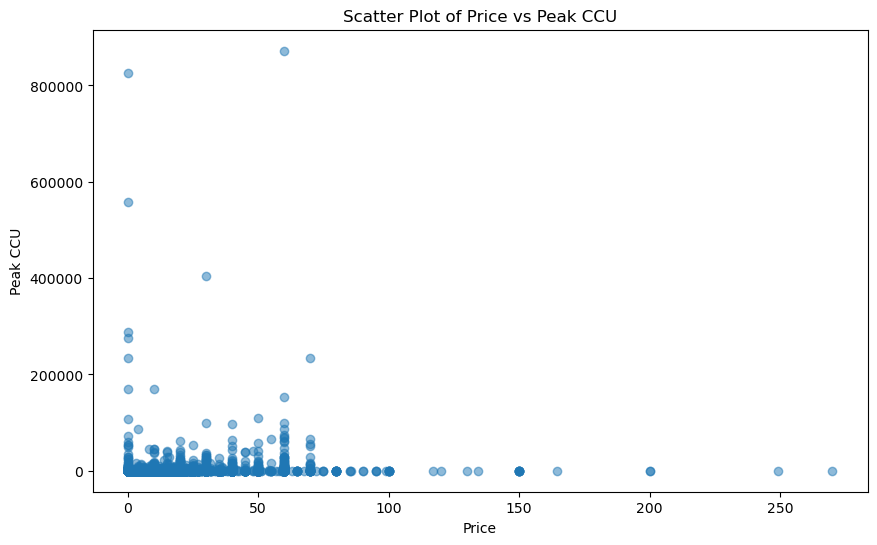

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Price'], new_df['Peak CCU'], alpha=0.5)
plt.title('Scatter Plot of Price vs Peak CCU')
plt.xlabel('Price')
plt.ylabel('Peak CCU')
plt.show()

Trực quan hoá cho quan hệ giữa Price và Estimated owners

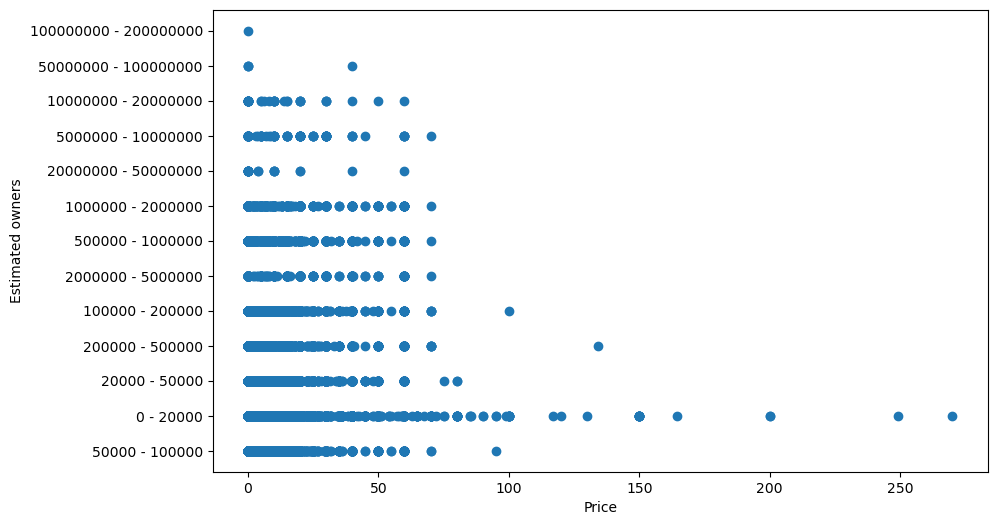

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Price'] , new_df['Estimated owners'])
#plt.xticks(rotation=45)
plt.ylabel('Estimated owners')
plt.xlabel('Price')
plt.show()

#### Nhận xét
- Phần lớn các tựa game online sẽ có giá tập trung trong khoảng 0 - 100$

- Các tựa game có giá 0$ ( miễn phí ) có lượng người chơi trong 1 thời điểm vượt trội so với các mức giá còn lại
- Khi xem xét trong cùng 1 khoảng số người sở hữu thì các game với mức giá thấp hơn sẽ chiếm số lượng nhiều hơn so với các mức giá khác.
 
**Như vậy nếu như Game có mức giá rẻ hơn sẽ khá thu hút người chơi quan tâm đến, tuy nhiên để có số người chơi thường xuyên thì cần phải làm nhiều điều hơn như vậy.**

### Câu hỏi 3: Xu hướng của ngành game hiện nay như thế nào ? Thể loại game nào đang hot và thu hút người chơi trong năm 2023 ? 
#### Mục đích
- Tìm hiểu về xu hướng của game hiện nay đang có dấu hiệu tăng hay giảm.
- Có được thông tin về thể loại game thu hút nhiều người chơi, từ đó có thể đưa ra những ý tưởng để làm game trong các năm tới.

#### Tiền xử lý 
- Dựa vào năm sản xuất, lọc ra những game được phát hành trong 10 năm trở lại đây
- Thống kê số lượng từng năm để xem xu hướng game được sản xuất
- Lọc ra 100 games có thời lượng chơi nhiều nhất
- Sau đó thống kê các thể loại của các game đó
- Trực quan hóa và kết luận.
#### Giải quyết


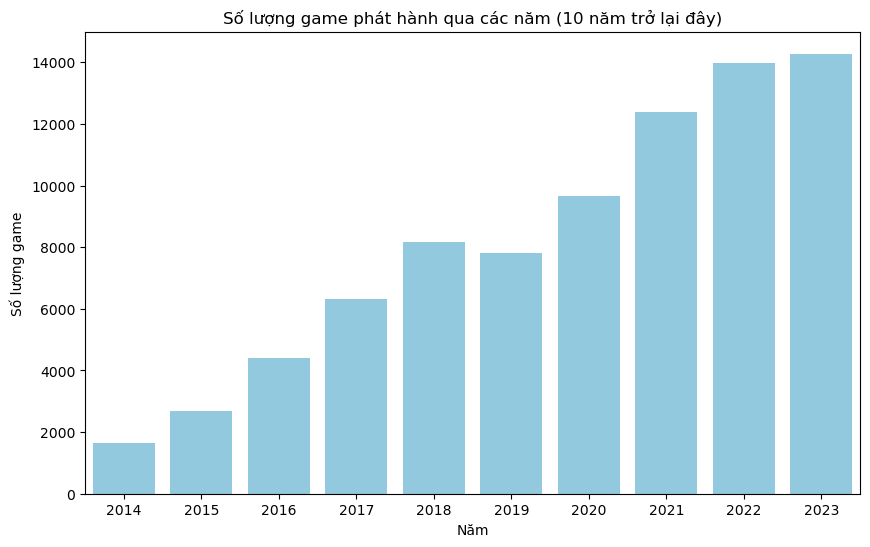

In [24]:
# Chuyển cột Release date sang định dạng datetime
game_df['Release date'] = pd.to_datetime(game_df['Release date'], format='%d-%b-%y')

# Thêm cột 'Release year' để lấy năm từ ngày phát hành
game_df['Release year'] = game_df['Release date'].dt.year


# Lấy danh sách các năm trong khoảng 10 năm trở lại đây
recent_years = range(pd.to_datetime('today').year - 10, pd.to_datetime('today').year + 1)

# Lọc dữ liệu chỉ giữ lại các game phát hành trong 10 năm gần đây
df_recent = game_df[game_df['Release year'].isin(recent_years)]

# Thống kê số lượng game qua các năm
games_per_year = df_recent['Release year'].value_counts().sort_index()

# Visualize dữ liệu
plt.figure(figsize=(10, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='skyblue')
plt.title('Số lượng game phát hành qua các năm (10 năm trở lại đây)')
plt.xlabel('Năm')
plt.ylabel('Số lượng game')
plt.show()

**Nhận xét:**
- Nhìn chung, xu hướng game có thể nói là tăng, tăng khá nhanh.
- Mỗi năm, số lượng game được phát hành càng lúc càng nhiều .=> cho thấy nhu cầu giải trí rất lớn.
- Số lượng có giảm ở năm 2019 (điều này là dễ hiểu, bởi đó là năm của đại dịch covid-19).

=> **Kết luận: Xu hướng game tăng và phát triện mạnh.**

Lọc ra những game ở năm 2023 và top 100 thời lượng chơi (game càng hút thì thời lượng chơi càng nhiều)

In [25]:
game_2023_df= game_df[game_df['Release year']==2023]
top_100_playtime = game_2023_df.nlargest(100, 'Average playtime forever')
top_100_playtime.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Publishers,Categories,Genres,Tags,Release year
80827,2195250,EA SPORTS FC™ 24,2023-09-28,200000 - 500000,52328,0,69.99,0,"English,French,Italian,German,Spanish - Spain,...","English,French,Italian,German,Spanish - Spain,...",...,22299,6667,1082,5884,1249,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Shar...","Simulation,Sports","Sports,Football (Soccer),Controller,PvP,Compet...",2023
83108,2252570,Football Manager 2024,2023-11-06,200000 - 500000,67697,0,59.99,1,"English,French,Italian,German,Spanish - Spain,...",None,...,3218,5105,1860,5942,2327,SEGA,"Single-player,Multi-player,Steam Achievements,...","Simulation,Sports,Strategy","Simulation,Sports,Strategy,Football (Soccer),M...",2023
83535,2285150,The Front,2023-10-11,200000 - 500000,5414,0,19.99,0,"English,French,German,Russian,Japanese,Simplif...",None,...,6040,4866,2926,1076,5020,Samar Studio,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Action,Indie,Massively Multiplayer,Simulation,...","Early Access,Multiplayer,Open World Survival C...",2023
82120,2059170,Quasimorph,2023-10-02,50000 - 100000,148,0,19.99,1,"English,Russian,French,German,Japanese,Korean,...",None,...,856,4755,822,4755,822,HypeTrain Digital,Single-player,"Indie,RPG,Simulation,Strategy,Early Access","Early Access,Turn-Based,RPG,Turn-Based Combat,...",2023
78847,2399830,ARK: Survival Ascended,2023-10-25,1000000 - 2000000,39814,0,44.99,0,"English,French,Italian,German,Spanish - Spain,...","English,Turkish",...,32263,3308,1170,3574,925,"Studio Wildcard,Snail Games USA","Single-player,Multi-player,MMO,PvP,Online PvP,...","Action,Adventure,Indie,Massively Multiplayer,R...","Early Access,Survival,Open World,Dinosaurs,Adv...",2023


Thống kê từng thể loại game trong top 100.

In [26]:
# Chia các thể loại game thành các dòng riêng biệt
genres_df = top_100_playtime['Genres'].str.split(',', expand=True)
# Chuyển đổi DataFrame với thể loại game thành dạng 'long' (tạo một dòng cho mỗi thể loại game)
genres_long = genres_df.melt(value_name='Genre').dropna()['Genre']

# Thống kê số lượng game cho mỗi thể loại
genre_counts = genres_long.value_counts()
genre_counts

Adventure                49
Action                   47
RPG                      46
Indie                    42
Strategy                 26
Simulation               25
Early Access             23
Casual                   12
Sports                    7
Massively Multiplayer     5
Racing                    3
Name: Genre, dtype: int64

Trực quan hóa nó

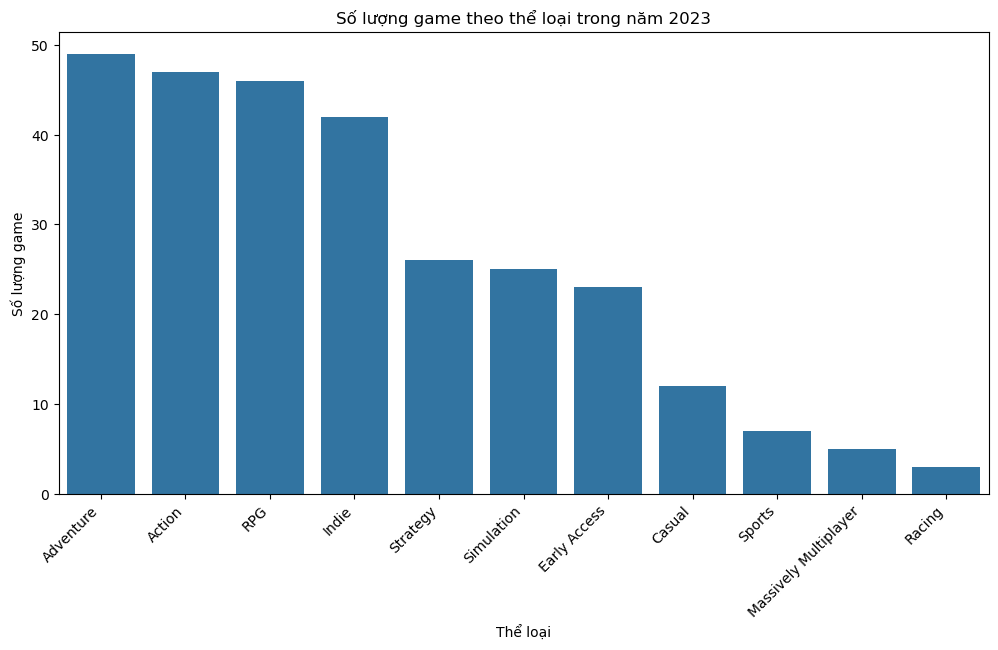

In [27]:
# Visualize dữ liệu
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Số lượng game theo thể loại trong năm 2023')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng game')
plt.xticks(rotation=45, ha='right')
plt.show()

**Nhận xét:**
- Có thể thấy, thể loại game adventure, action, rpg, indie khá là hot (khi mà có 40/100 game có thể loại này rồi)
- Đó cũng là những thể loại game thường thấy.
- Những thể loại game còn lại thì mặc dù số lượng ít, mang màu mới mẻ hơn, như là sports và racing.

=> **Kết luận: nhìn chung thì mỗi thể loại đều có những cái hay của nó, nhưng xu hướng chung người chơi sẽ dành nhiều thời gian chơi những game về adventure, action, rpg, indie. Đương nhiên là những thể loại khác cũng rất tiềm năng, nhưng sẽ đòi hỏi sự xây dựng rất tốt đến từ phía nhà sản xuất game để thu hút người chơi.**

#### Liệu 10 năm gần đây, thể loại adventure có hot như trên không?

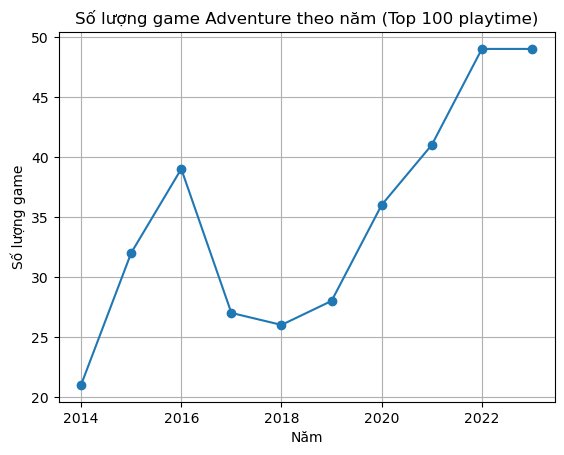

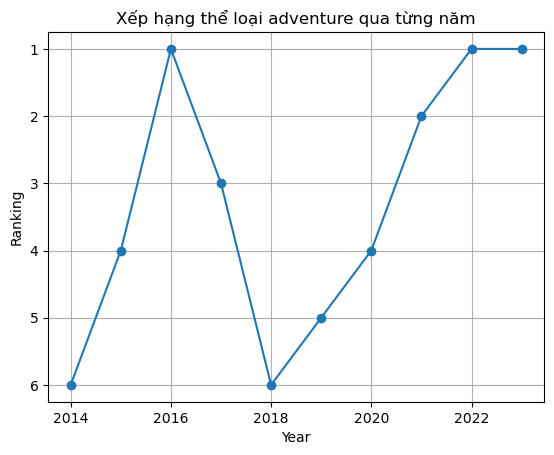

In [28]:
# Khởi tạo một DataFrame để lưu trữ số lượng game 'Adventure' theo năm
adventure_counts_by_year = pd.DataFrame(index=range(2014, 2025), columns=['Adventure'])
rank_list=[]
years=[]


for i in range(2014, 2024):
    game_gen_df = game_df[game_df['Release year'] == i]
    top_100_playtime = game_gen_df.nlargest(100, 'Average playtime forever')
    genres_df = top_100_playtime['Genres'].str.split(',', expand=True)
    
    # Chuyển đổi DataFrame với thể loại game thành dạng 'long' (tạo một dòng cho mỗi thể loại game)
    genres_long = genres_df.melt(value_name='Genre').dropna()['Genre']
    
    # Thống kê số lượng game cho mỗi thể loại
    genre_counts = genres_long.value_counts()
    index_of_action = genre_counts.index.get_loc('Adventure')
    years.append(i)
    rank_list.append(index_of_action+1)
    # Lấy số lượng game 'Adventure' và gán vào DataFrame adventure_counts_by_year
    if 'Adventure' in genre_counts.index:
        adventure_counts_by_year.at[i, 'Adventure'] = genre_counts['Adventure']
    else:
        adventure_counts_by_year.at[i, 'Adventure'] = 0

# Trực quan số lượng
plt.plot(adventure_counts_by_year.index, adventure_counts_by_year['Adventure'], marker='o')
plt.title('Số lượng game Adventure theo năm (Top 100 playtime)')
plt.xlabel('Năm')
plt.ylabel('Số lượng game')
plt.grid(True)
plt.show()

#Trực quan ranking
plt.plot(years, rank_list, marker='o')
plt.title('Xếp hạng thể loại adventure qua từng năm')
plt.xlabel('Year')
plt.ylabel('Ranking')

plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

**Nhận xét:**
- Có thể thấy, adventure từng đứng đầu vào năm 2016, nhưng sau đó có xu hướng giảm vào 2 năm sau.
- Nhưng từ 2018 trở đi, những game về adventure đang có xu hướng tăng, và đứng đầu vào 2 năm trở lại đây.
- Đây là thể loại tiềm năng và sẽ có khả năng phát triển lớn vào các năm sau.

=> Các nhà phát hành nên đầu từ vào những game thể loại adventure.

### Câu hỏi 4: Việc game chạy được trên đa nền tảng (thích ứng nhiều hơn một hệ điều hành) có ảnh hướng tới giá của game hay không ?
#### Mục đích
- Để biết thêm về việc chi phí cho phát triển game đa nền tảng có tốn kém ảnh hưởng tới giá game hay không.
- Khảo sát giá để người chơi thuộc hệ điều hành khác windows có thể tham khảo.
#### Tiền xử lý 
- Ta tạo thêm một cột Multiplatform để khảo sát (dựa vào các biến bool của Win,Mac,Linux)
- Sau đó trực quan hóa và kết luận.
#### Giải quyết

Tạo biến mới 'Multiplatform' dựa trên điều kiện có ít nhất 2 trong 3 nền tảng được hỗ trợ

In [29]:
df=game_df
# Tạo biến mới 'Multiplatform' dựa trên điều kiện có ít nhất 2 trong 3 nền tảng được hỗ trợ
df['Multiplatform'] = df[['Windows', 'Mac', 'Linux']].sum(axis=1) >= 2

So sánh trung bình

In [30]:
average_price_multiplatform = df[df['Multiplatform']]['Price'].mean()
average_price_singleplatform = df[~df['Multiplatform']]['Price'].mean()

print(f'Giá trung bình của game hỗ trợ đa nền tảng: {average_price_multiplatform}')
print(f'Giá trung bình của game không hỗ trợ đa nền tảng: {average_price_singleplatform}')

Giá trung bình của game hỗ trợ đa nền tảng: 7.542648567764002
Giá trung bình của game không hỗ trợ đa nền tảng: 7.095104089563286


**Nhận xét:**
- Có thể thấy, game đa nền tảng sẽ mắc hơn một chút so với game không hỗ trợ đa nền tảng.
- Ở đây chỉ có tính tham khảo, không có quyết định hoàn toàn, nhưng nhìn chung thì có vẻ đúng, vì game chạy được 2 hệ điều hành trở lên sẽ khó triển khai hơn.

Trực quan hóa

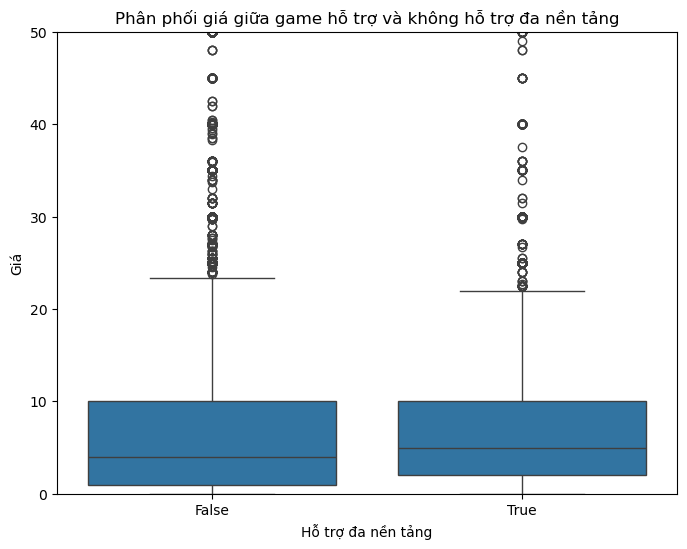

In [31]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Multiplatform', y='Price', data=df)
plt.title('Phân phối giá giữa game hỗ trợ và không hỗ trợ đa nền tảng')
plt.xlabel('Hỗ trợ đa nền tảng')
plt.ylabel('Giá')
# vì có khá nhiều giá trị ngoại lệ nên ta sẽ set lại y limit để cho dễ nhìn hơn.
plt.ylim(0, 50)
plt.show()


**Nhận xét**
- Bỏ qua những giá trị ngoại lệ đi ( vì game mắc tiền thì hầu như lúc nào cũng có), ta chỉ để ý những game tầm từ 20 đô đổ lại.
- Có thể thấy, game đa nền tảng sẽ một phần nào đó mắc tiền hơn những game không hỗ trợ đa nền tảng.

**Kết luận: Có ảnh hưởng một chút về giá nếu như game đó hỗ trợ đa nền tảng**

## 5. Tổng kết

### Thành viên 1: Trần Nam Phương

#### Khó khăn gặp phải  
-   Đặt câu hỏi dựa trên dữ liệu thu thập được.
#### Những kiến thức học được
-   Sử dụng trello để phân công việc.
-   Sử dụng github để quản lý đồ án.

### Thành viên 2: Mai Đăng Đức Tài

#### Khó khăn gặp phải: 
- Khó trong cách suy nghĩ để đặt câu hỏi, đặt vấn đề,tìm cách giải quyết.

#### Những kiến thức học được: 
- Những kiến thức về thu thập, tiền xử lý, cũng như các cách trực quan hóa, nhận xét dữ liệu.
- Cách xài git, github
- Khả năng làm việc, thảo luận với nhóm.

### Thành viên 3: Nguyễn Thành Trung

#### Khó khăn gặp phải  :
- Dữ liệu lớn và nhiều cột khiến cho việc xử lí khó khăn hơn
- Cấu trúc dữ liệu ở mỗi cột khá phức tạp
- Tìm đồ thị để trực quan hoá phù hợp

#### Những kiến thức học được
- Kĩ năng tiền xử lí dữ liệu
- Cách đặt câu hỏi và chọn đồ thị trực quan hoá phù hợp

### Nhóm sẽ làm gì nếu có thêm thời gian ? 
- Làm bài trau truốt hơn, cũng như nghĩ thêm những câu hỏi hay hơn, nếu được cũng muốn áp dụng thêm các mô hình học máy.

## Nguồn tham khảo

Các lab 1, 2 ,3 đã làm trước đó